<a href="https://colab.research.google.com/github/imoleayomideajay/Analysis_of_Scanning_Electron_Microscopy_Data/blob/master/2_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology, color, io
import numpy as np

In [34]:
image_path = '/content/2-003.tif'
pixels_to_um = 1000
image = Image.open(image_path)

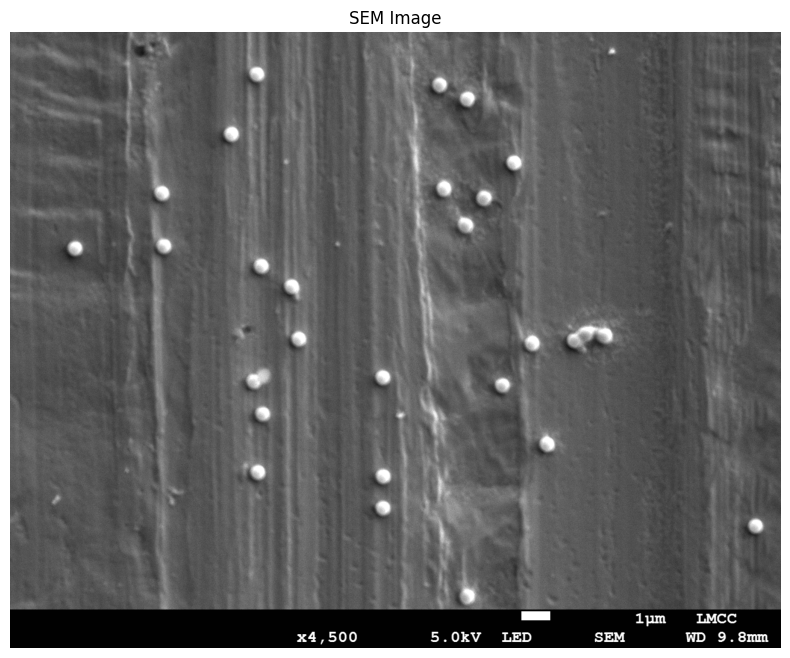

In [35]:
plt.figure(figsize=(10, 8))
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide the axis
plt.title('SEM Image')
plt.show()

In [37]:

image_width, image_height = image.size
crop_box = (image_width // 4, image_height // 4, image_width * 3 // 4, image_height * 3 // 4)
image = image.crop(crop_box)

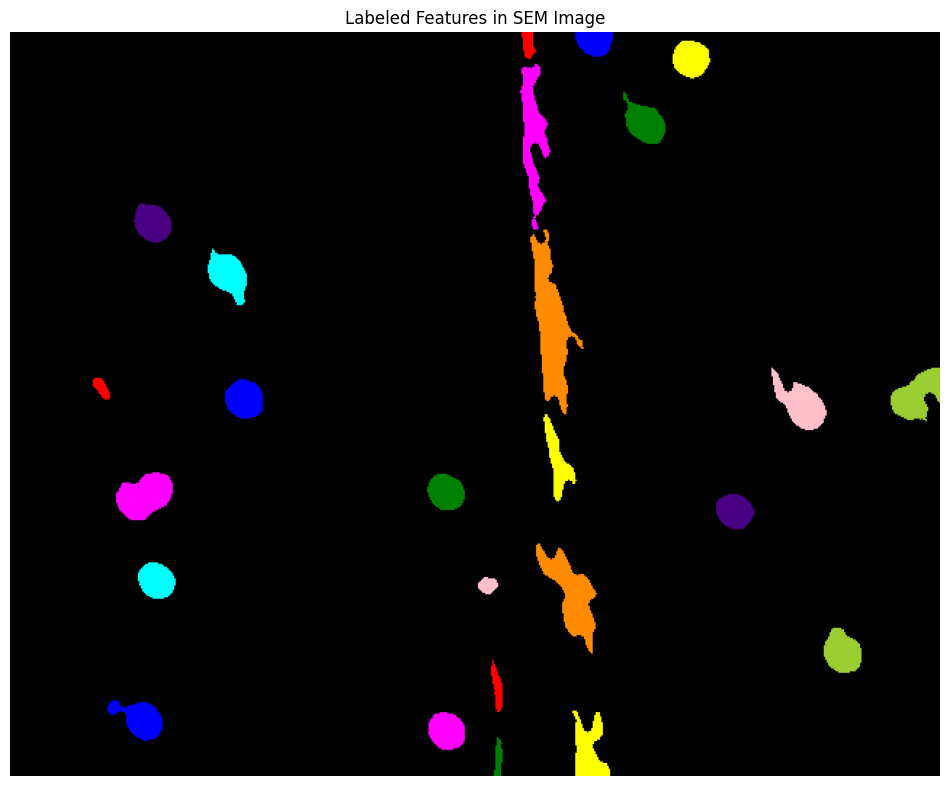

[12.865501965161373,
 21.320096563347295,
 25.731003930322746,
 36.59846992787254,
 27.777385840094972,
 26.099485750361293,
 48.50718172261279,
 28.65727667372076,
 31.655007845624887,
 31.229817342839755,
 11.726460285670077,
 26.749964937194992,
 25.15551736167189,
 33.982764264767994,
 25.43237481489809,
 24.926710529686012,
 39.79836672089123,
 25.25654394235911,
 12.412170838050638,
 27.754457742221764,
 14.494292838262302,
 27.937355653723827,
 29.2726871606753,
 25.903614421069328,
 12.047792665040703]

In [38]:
if image.mode != 'L':
    image = image.convert('L')

# Convert PIL Image to NumPy array for analysis
image_np = np.array(image)

# Apply a Gaussian filter for noise reduction
gaussian_filtered = filters.gaussian(image_np, sigma=1)

# Apply Otsu's method to find a threshold value
thresh_val = filters.threshold_otsu(gaussian_filtered)
binary_image = gaussian_filtered > thresh_val

# Morphological closing to close small holes in the foreground
closed_image = morphology.binary_closing(binary_image, morphology.disk(3))

# Remove small objects (noise)
cleaned_image = morphology.remove_small_objects(closed_image, min_size=100)

# Label the features in the image
label_image, _ = measure.label(cleaned_image, return_num=True, connectivity=2)

# Measure properties of labeled regions
props = measure.regionprops(label_image)

# Calculate sizes using the scale (assuming pixel size is accurately represented by the scale bar of 1 micron)
# Here we use the equivalent diameter of a circle with the same area as the region for a simple size estimate
sizes_microns = [prop.equivalent_diameter for prop in props]

# Plot the cleaned and labeled image for visualization
plt.figure(figsize=(12, 10))
plt.imshow(color.label2rgb(label_image, bg_label=0), cmap='nipy_spectral')
plt.axis('off')
plt.title('Labeled Features in SEM Image')
plt.show()

sizes_microns

Threshold

(array([[ 0.,  5., 59., ...,  2.,  1.,  0.],
        [ 0.,  5., 59., ...,  2.,  1.,  0.],
        [ 0.,  5., 57., ...,  2.,  0.,  0.],
        ...,
        [ 0.,  1., 37., ...,  0.,  0.,  0.],
        [ 0.,  2., 39., ...,  0.,  0.,  0.],
        [ 0.,  2., 39., ...,  0.,  0.,  0.]]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <a list of 1280 BarContainer objects>)

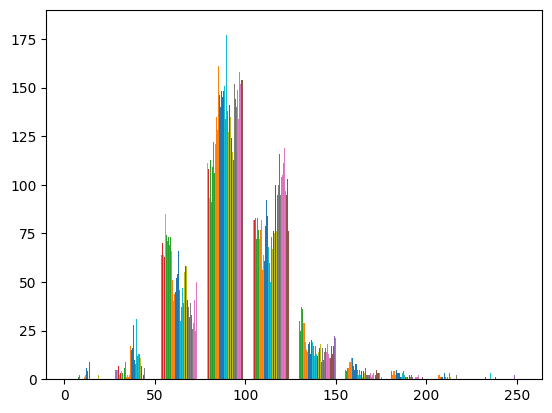

In [15]:
plt.hist(gray_img)

In [17]:
ret, thresh = cv2.thresh(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

AttributeError: module 'cv2' has no attribute 'thresh'